In [1]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Markov Reward Process
## TSMC

**only one recurrent state**

$$
P = 
\begin{array}{c c} 
& \begin{array}{c c c} G & A & B \\ \end{array} \\
\begin{array}{c c c}G \\ A \\ B \end{array} &
\left
[
\begin{array}{c c c}
.3 & .6 & .1 \\
.2 & .5 & .3 \\
.3 & .5 & .2
\end{array}
\right
]
\end{array}
$$


In [2]:
# the TSMC profit matrix
P = np.array(
    [[.3, .6, .1],
    [.2, .5, .2],
    [.3, .5, .2]])
Pt = np.matrix(P).reshape(3,3)
Pt

matrix([[0.3, 0.6, 0.1],
        [0.2, 0.5, 0.2],
        [0.3, 0.5, 0.2]])

In [3]:
#r = np.array([10,3,1]).matrix().reshape(3,1)
R = np.matrix([10,3,1]).reshape(3,1)
r = .9
I3 = np.identity(3)
I3 - r*Pt

matrix([[ 0.73, -0.54, -0.09],
        [-0.18,  0.55, -0.18],
        [-0.27, -0.45,  0.82]])

In [4]:

np.linalg.inv(I3 - r*Pt)*R

matrix([[36.91087619],
        [26.70787543],
        [28.02985428]])

## MC processes & Transient to Recurrent Probability
 - **it is transient(1) and recurrent(2) MC**
 - *at least one absorbing state*
  


$$
P = 
\begin{array}{c c } 
 & \begin{array}{c c c c} S1 & S2 & D1 & F \\ \end{array} \\
\begin{array}{c c c c}S1 \\ S2 \\ D1 \\ F \end{array} &
\left
[
\begin{array}{c c c}
.5 & .5 & 0 & 0 \\
.4 & .6 & 0 & 0 \\
.1 & .5 & .6 & .15 \\
0 & 0 & 0 & 1
\end{array}
\right
]
\end{array}
\\
$$

- The revenue is 
$$
R(s) = 
\begin{array}{c c}
X_t & R(X_t)\\
S1 & 20 \\
S2 & 10 \\
D1 & -15 \\
F  & 0
\end{array}
$$
---

In [29]:

P = np.array(
    [[.5, .5, 0, 0],
    [.4, .6, 0, 0],
    [.1, .15, .6, .15],
    [0, 0, 0, 1]])
Pt = np.matrix(P).reshape(4,4)
Pt[:2,:2]

matrix([[0.5, 0.5],
        [0.4, 0.6]])

In [32]:
# q-a
# np.linalg.inv(np.identity(2)-Pt[:2,:2]) # sigular matrix
np.linalg.inv(np.identity(2)-.9*Pt[:2,:2]) # times .9 become ok


matrix([[5.05494505, 4.94505495],
        [3.95604396, 6.04395604]])

In [33]:
# q-b
(1-.6)**(-1)

2.5

In [34]:
# q-c
# prob of ever visit F means expected value times the probability of D1 to F

2.5 * .15

0.375

In [35]:
# q-d
# prob of ever visit F means expected value times the probability of D1 to S1 and S2
# this also mean "prob of success"
2.5*(.1+.15)

0.625

## The similar example for recurrent and transient state MC
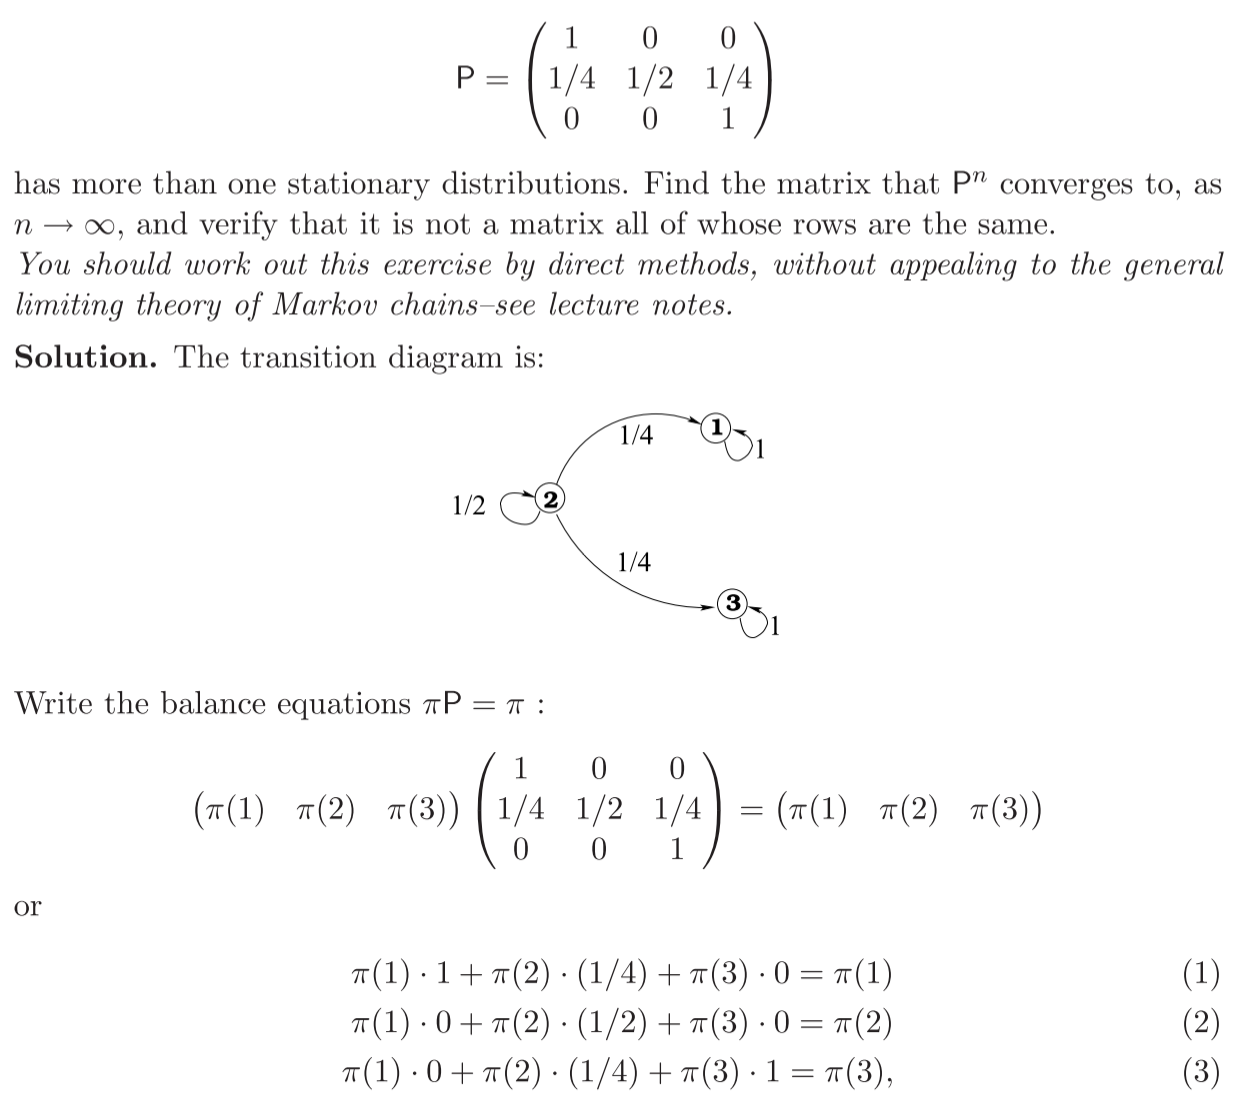
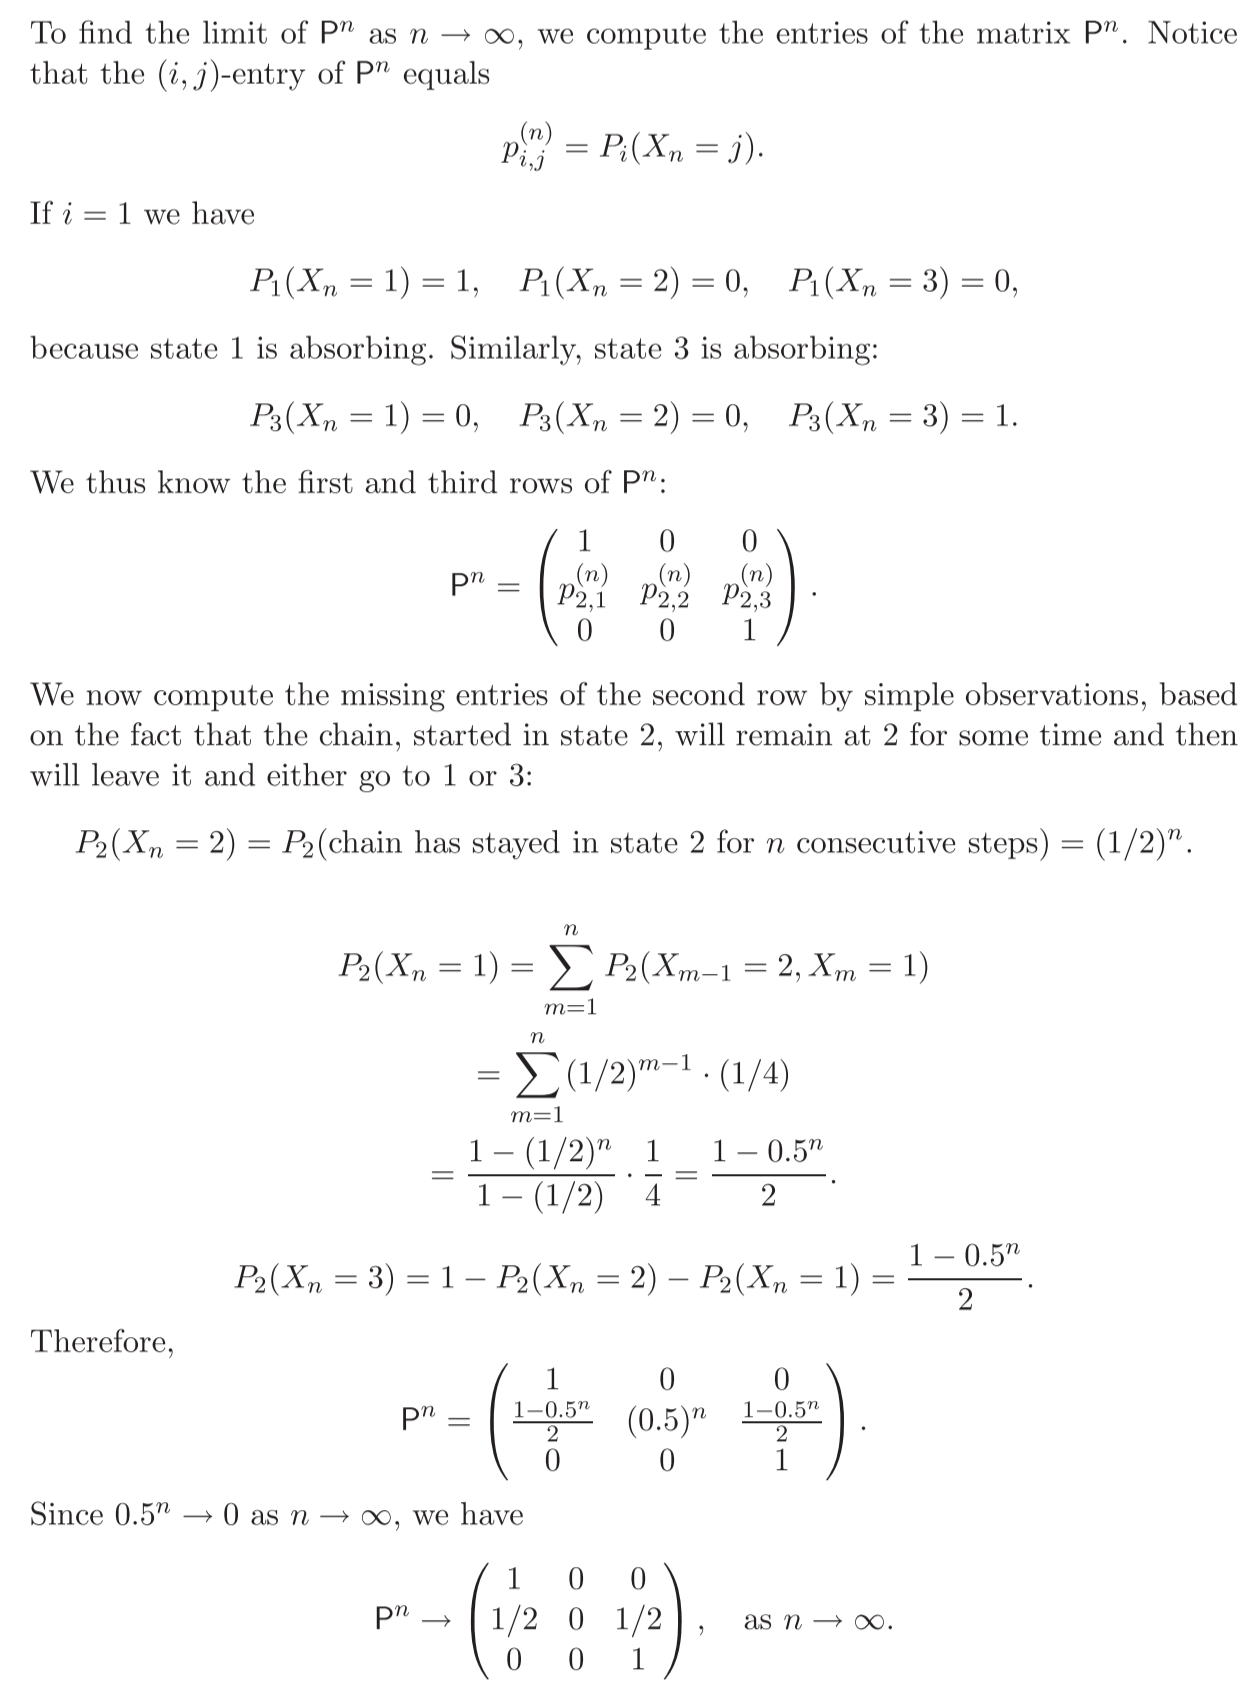

## 

## More advanced example: 2 recurrent and 1 transient class

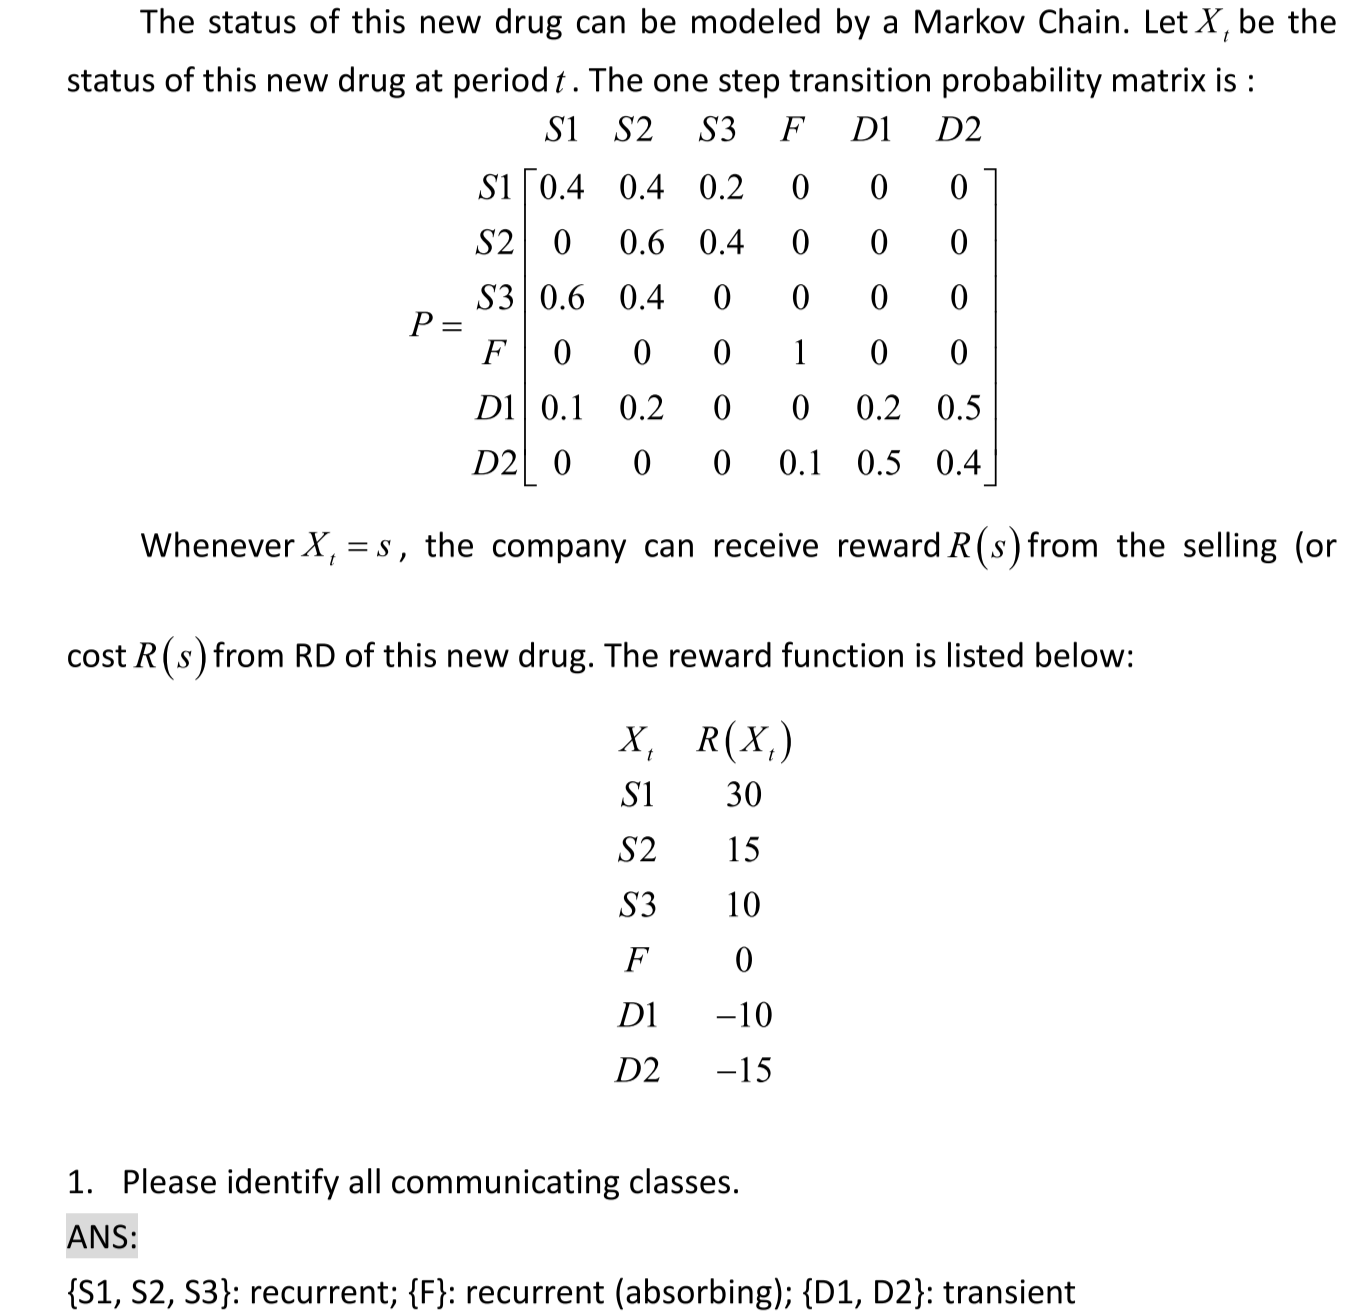
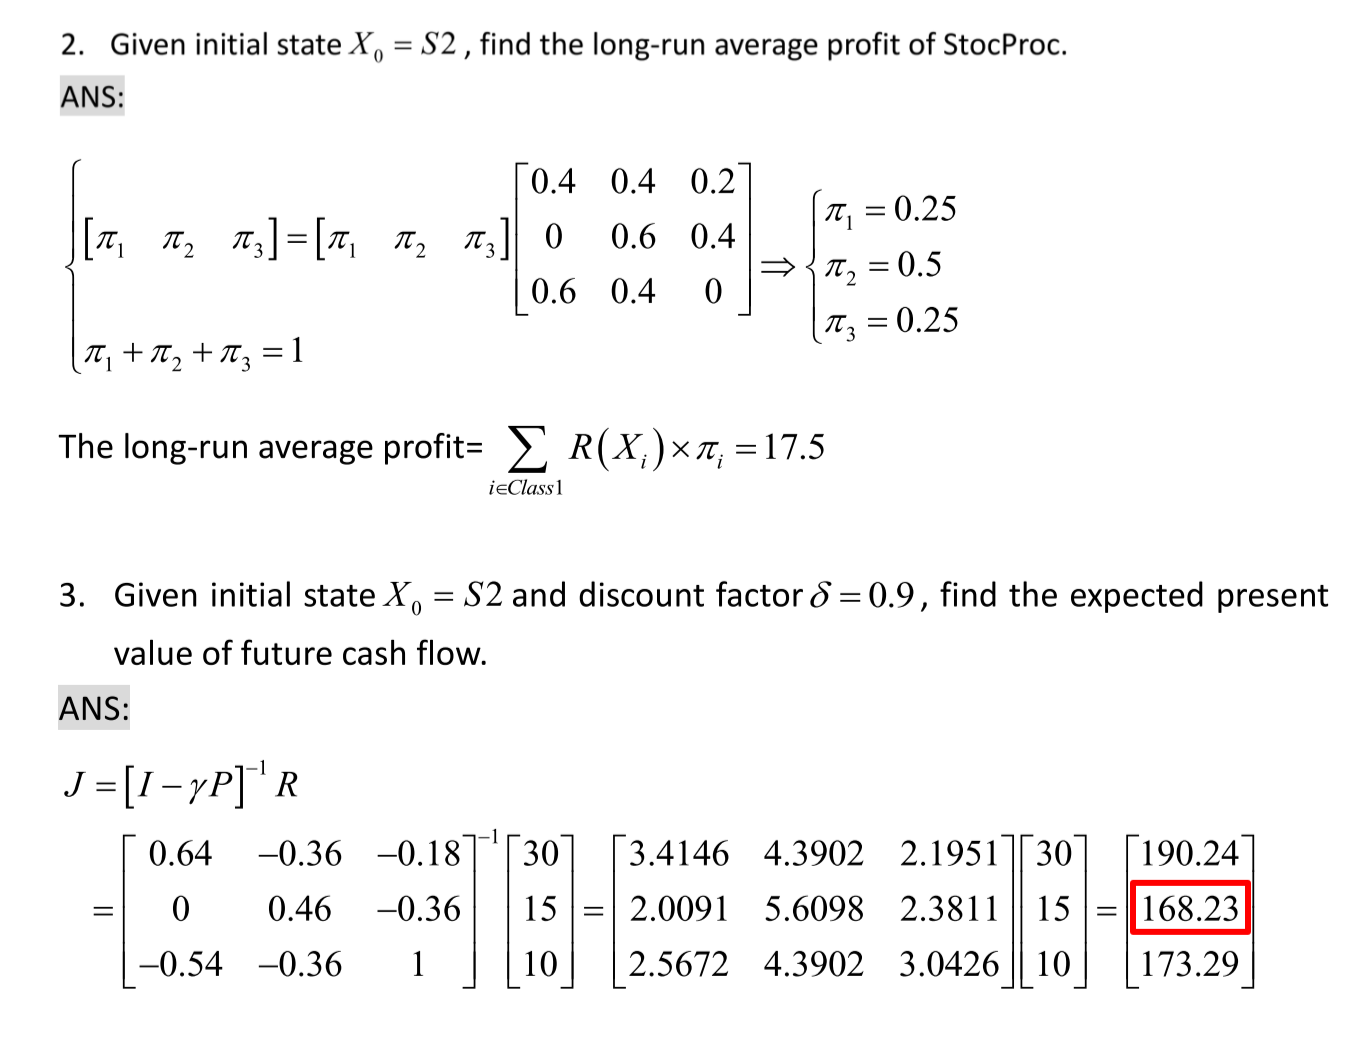
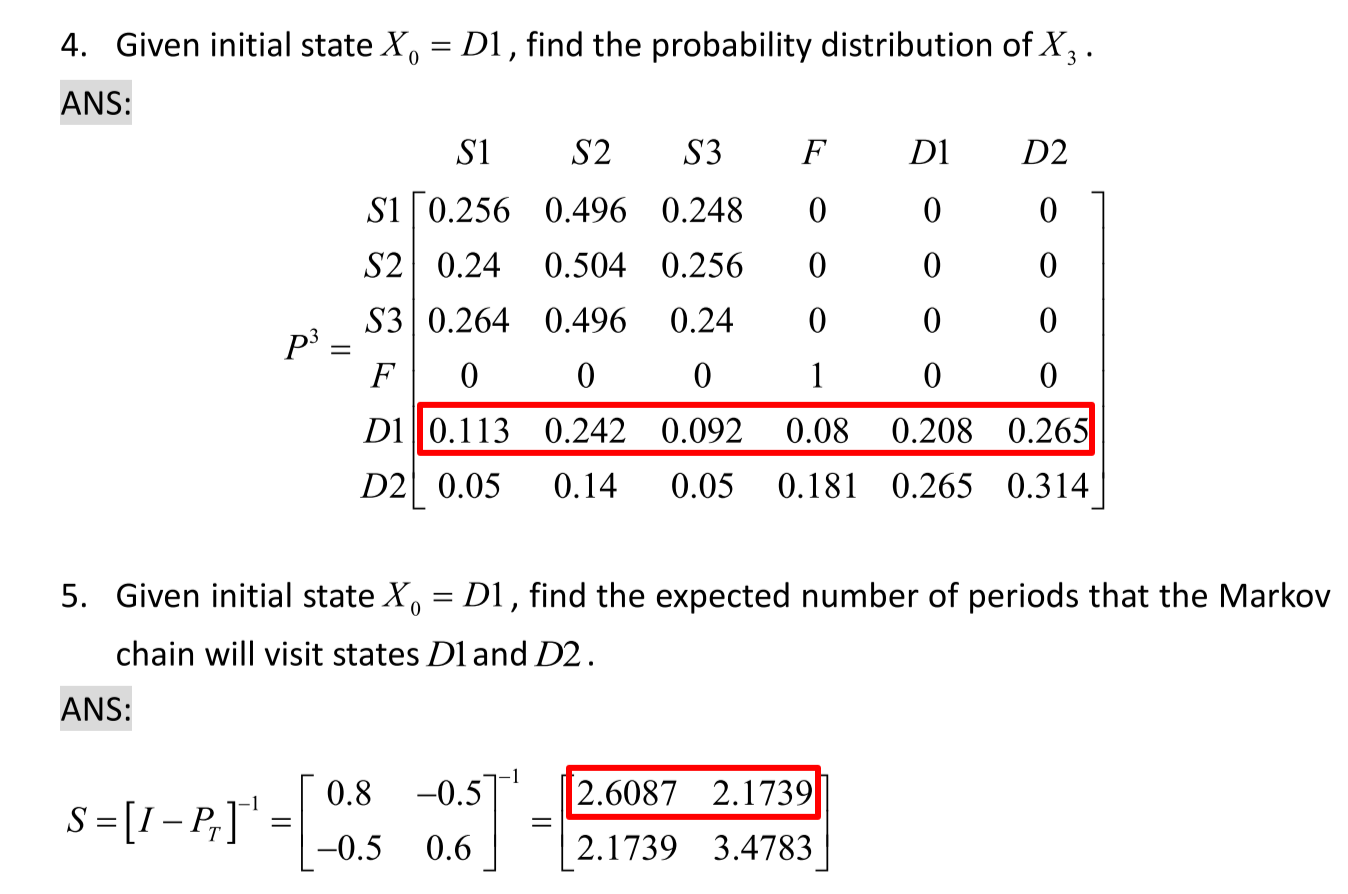
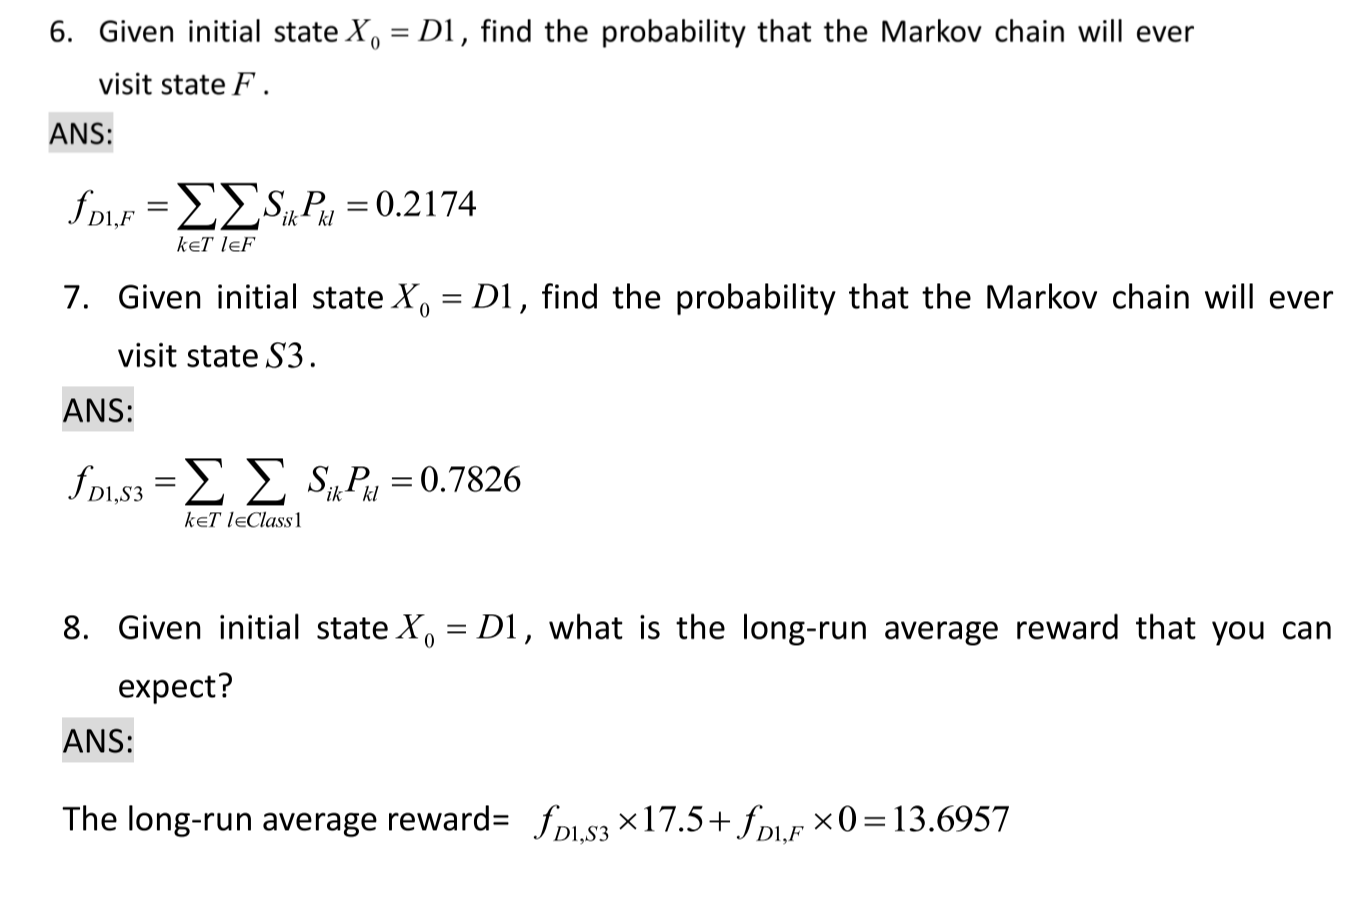

In [50]:
# q-2

r = np.matrix([30,15,10]).reshape(3,1)
np.matrix([.25,.5,.25]).reshape(1,3)*r

matrix([[17.5]])

In [42]:
# q-3
# X0 = S2, value of future cash flow
sigma = .9
s = np.matrix([[.4,.4,.2],
                [0,.6,.4],
                [.6,.4,0]]).reshape(3,3)

r = np.matrix([30,15,10]).reshape(3,1)
j = np.linalg.inv(np.identity(3)-sigma*s)*r
j

matrix([[190.24390244],
        [168.23067383],
        [173.2947499 ]])

In [44]:
# q-4
# X0=D1, find P3
P = np.matrix([[.4,.4,.2,0,0,0],
                [0,.6,.4,0,0,0],
                [.6,.4,0,0,0,0],
                [0,0,0,1,0,0],
                [.1,.2,0,0,.2,.5],
                [0,0,0,.1,.5,.4]]).reshape(6,6)
P3 = np.linalg.matrix_power(P,3)
P3


matrix([[0.256, 0.496, 0.248, 0.   , 0.   , 0.   ],
        [0.24 , 0.504, 0.256, 0.   , 0.   , 0.   ],
        [0.264, 0.496, 0.24 , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 1.   , 0.   , 0.   ],
        [0.113, 0.242, 0.092, 0.08 , 0.208, 0.265],
        [0.05 , 0.14 , 0.05 , 0.181, 0.265, 0.314]])

In [46]:
# q-5
# X0=D1, prob visit D1 and D2
D = np.matrix([[.2,.5],[.5,.4]]).reshape(2,2)
D = np.matrix([[.2,.5],[.5,.4]]).reshape(2,2)
np.linalg.inv(np.identity(2)-D)

matrix([[2.60869565, 2.17391304],
        [2.17391304, 3.47826087]])

In [47]:
# q-6 
# find the probability that the Markov chain will ever visit F
# P(the project will fail)
2.17391304 * .1

0.217391304

In [48]:
# q-7 
# find the probability that the Markov chain will ever visit S3
# note: expected stay in D1 times the probabilty will go to S
# P(project will success)
2.60869565* (.1+.2) 

0.7826086950000001

In [51]:
# q-8
# what is the long-run average reward that you can expect
17.5*.7823 + 0*.2174

13.69025

## The difficult one comprehensive MC
***10 states!!!***
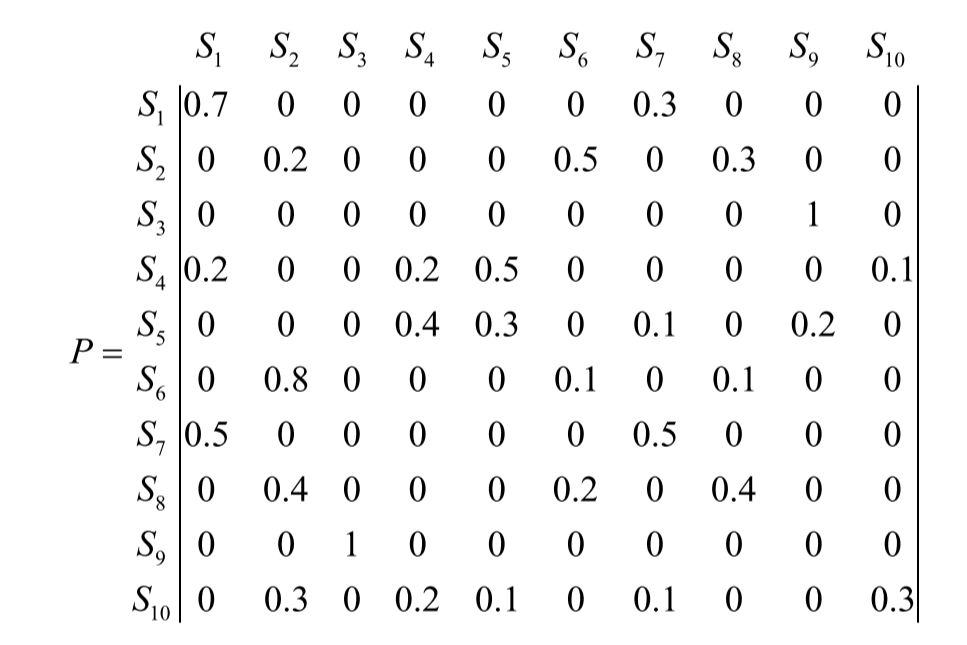

$$
Recurrent \ State=\{S1,S7\},\{S2,S6,S8\},\{S3,S9\}\\
Transient \ State=\{S4,S5,S10\}
$$

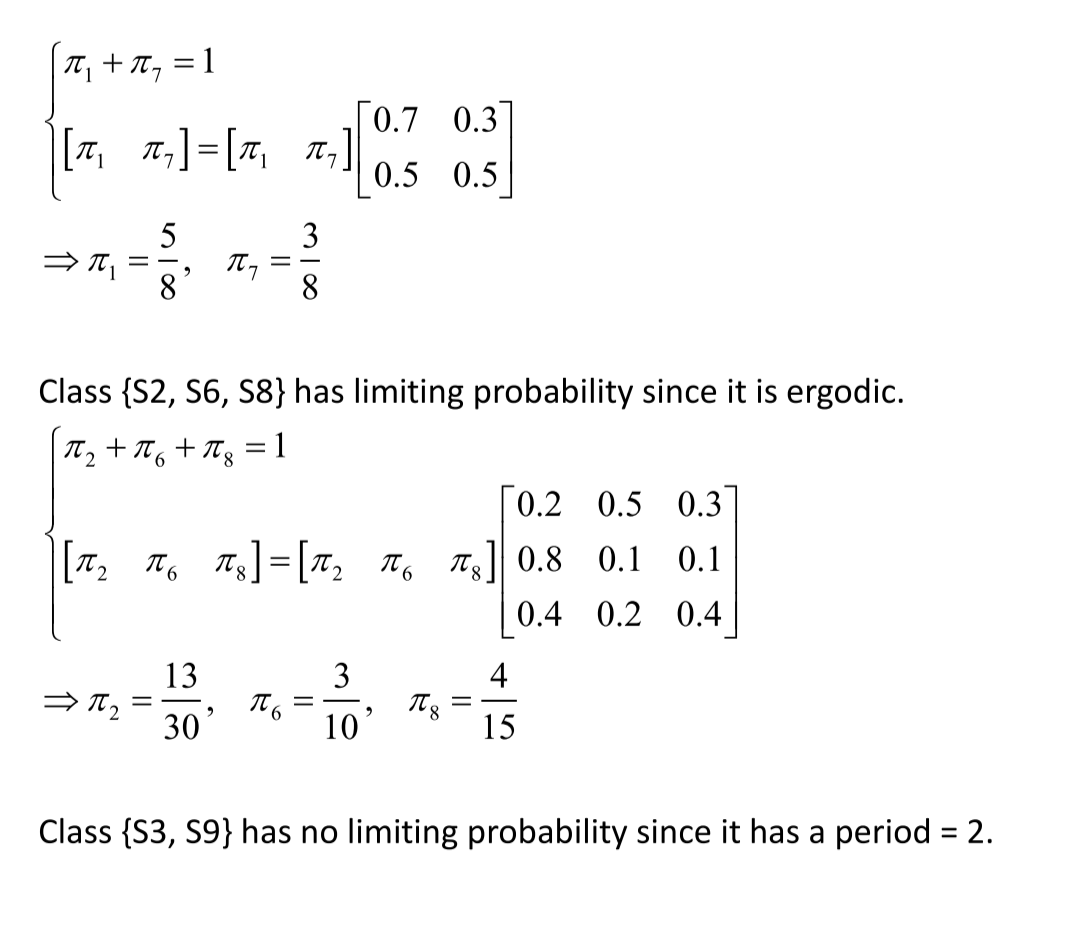

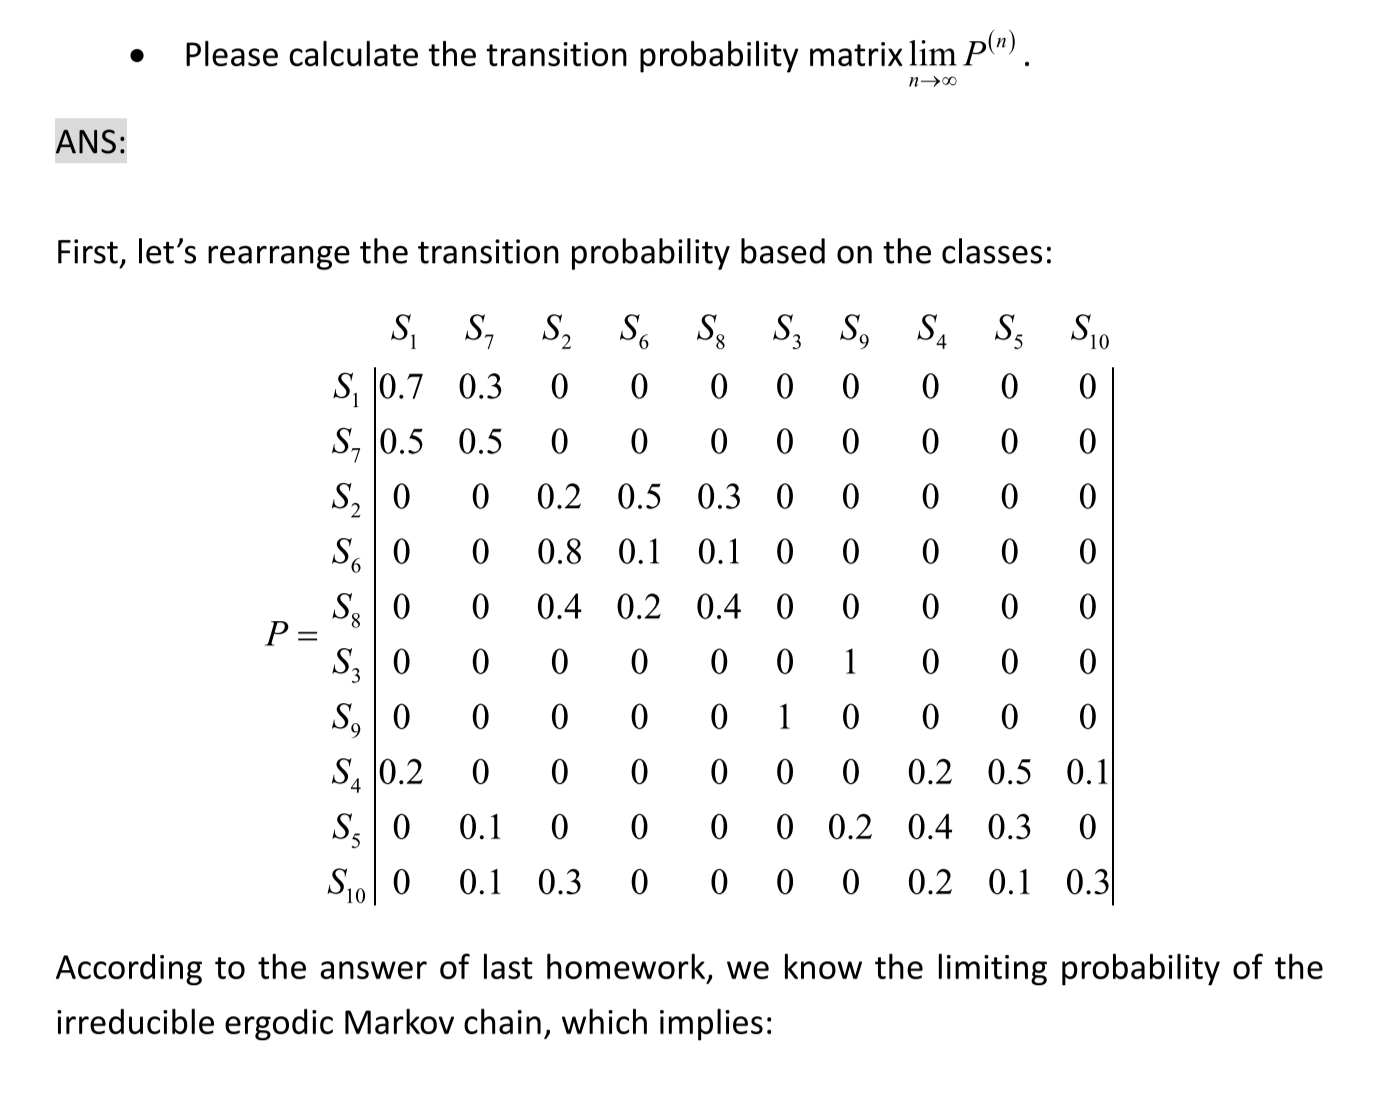
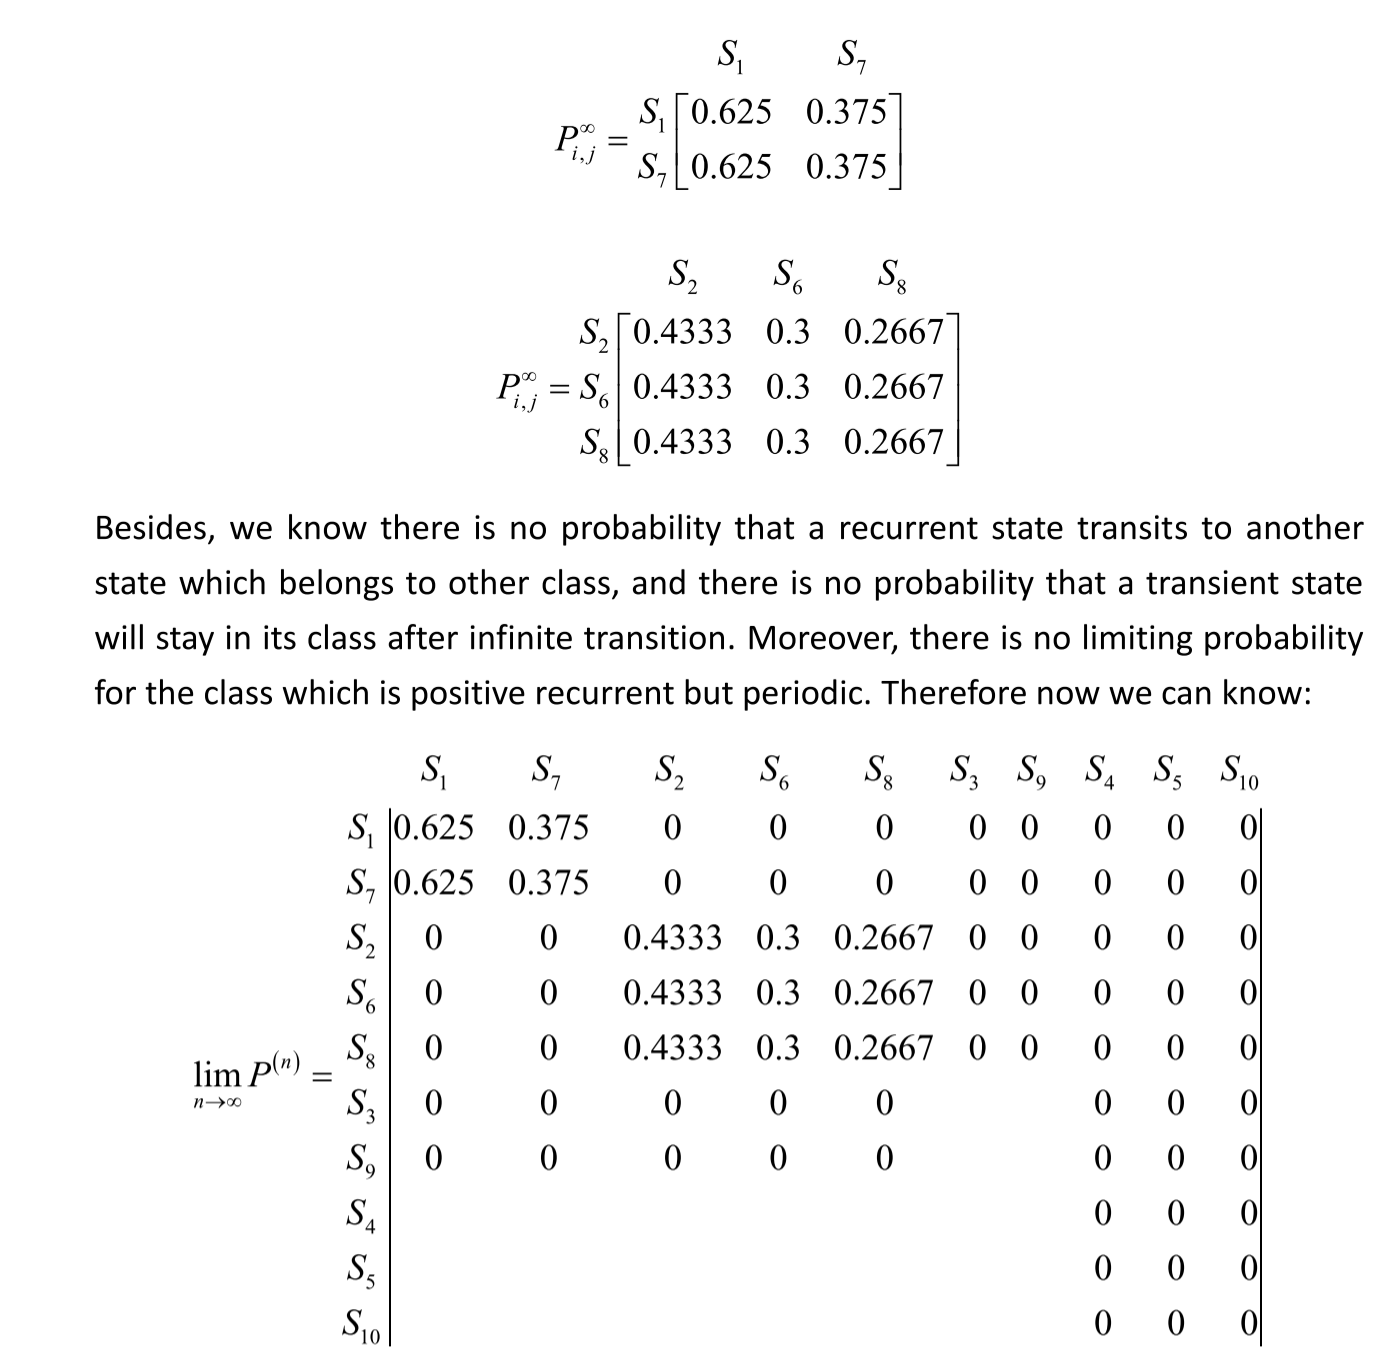

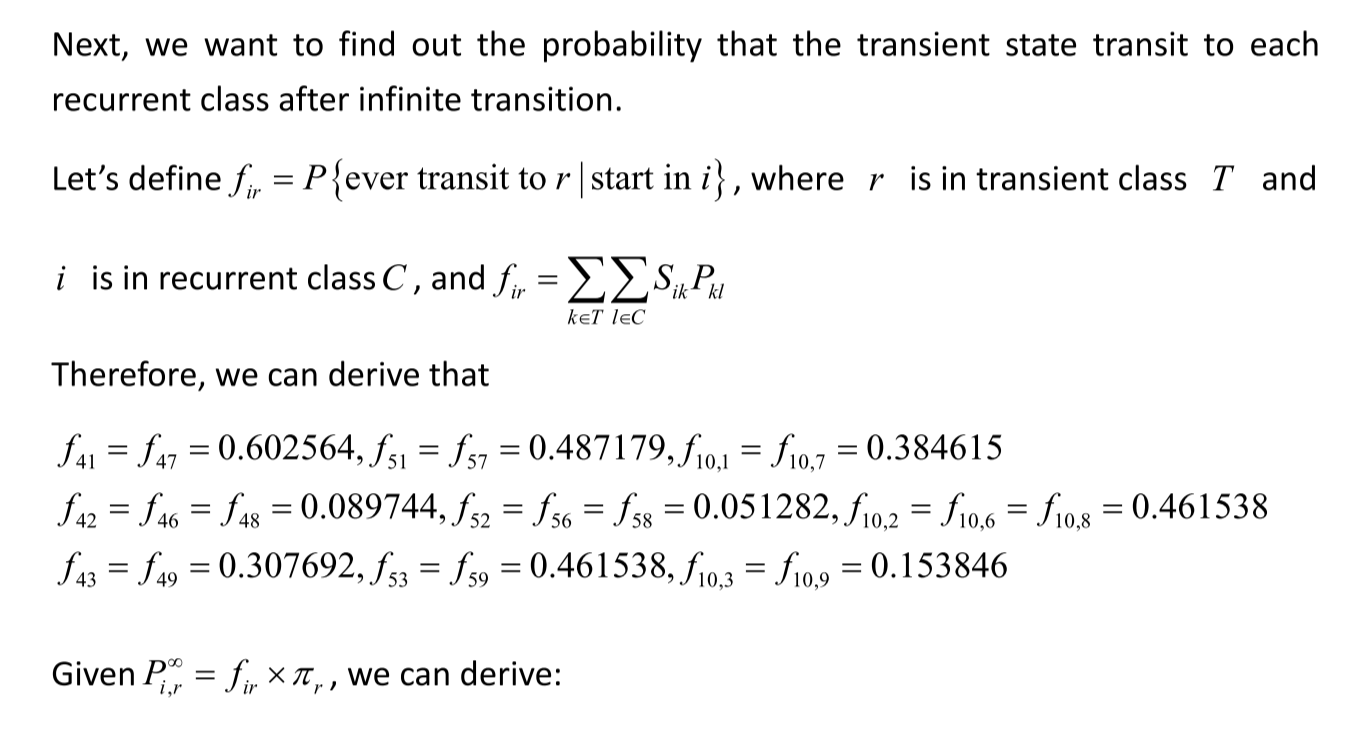
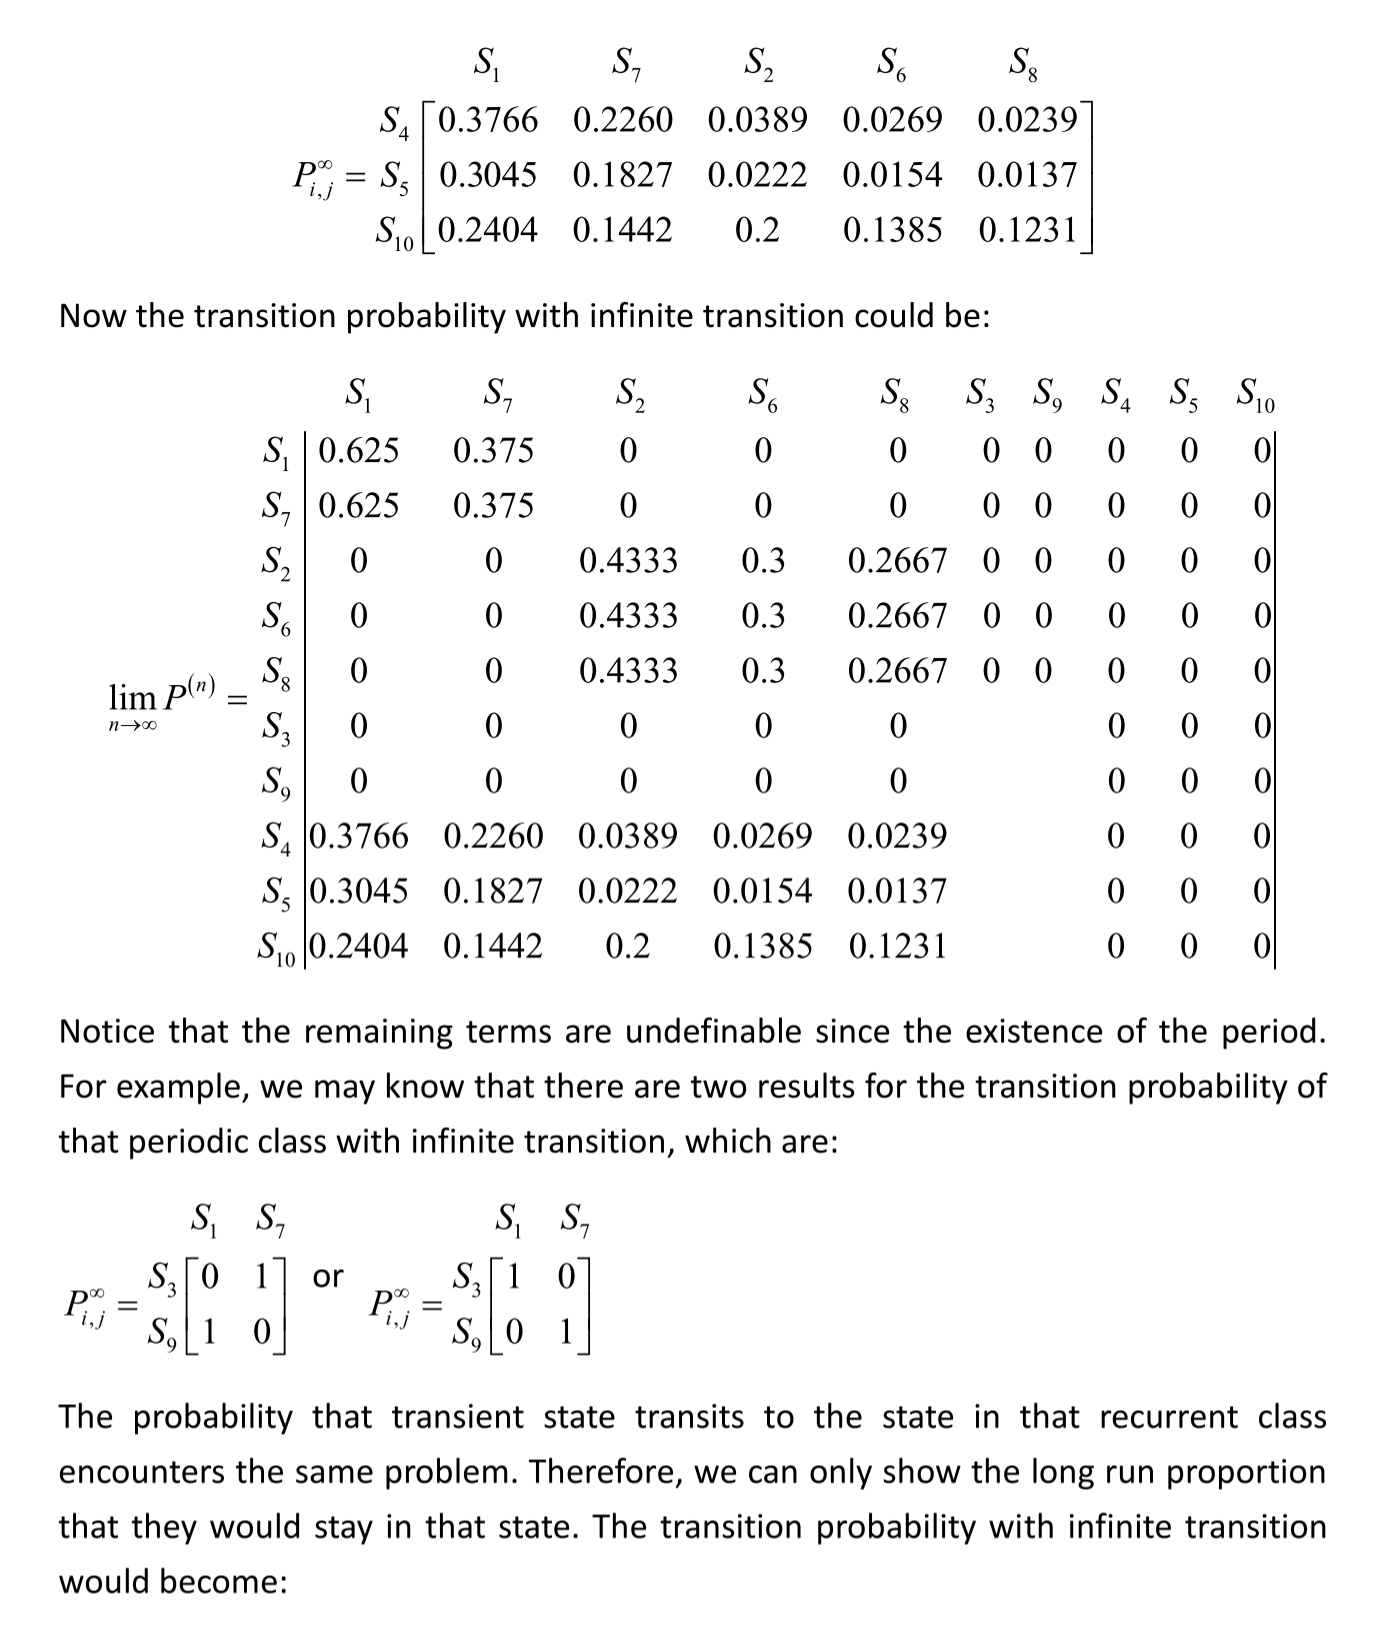
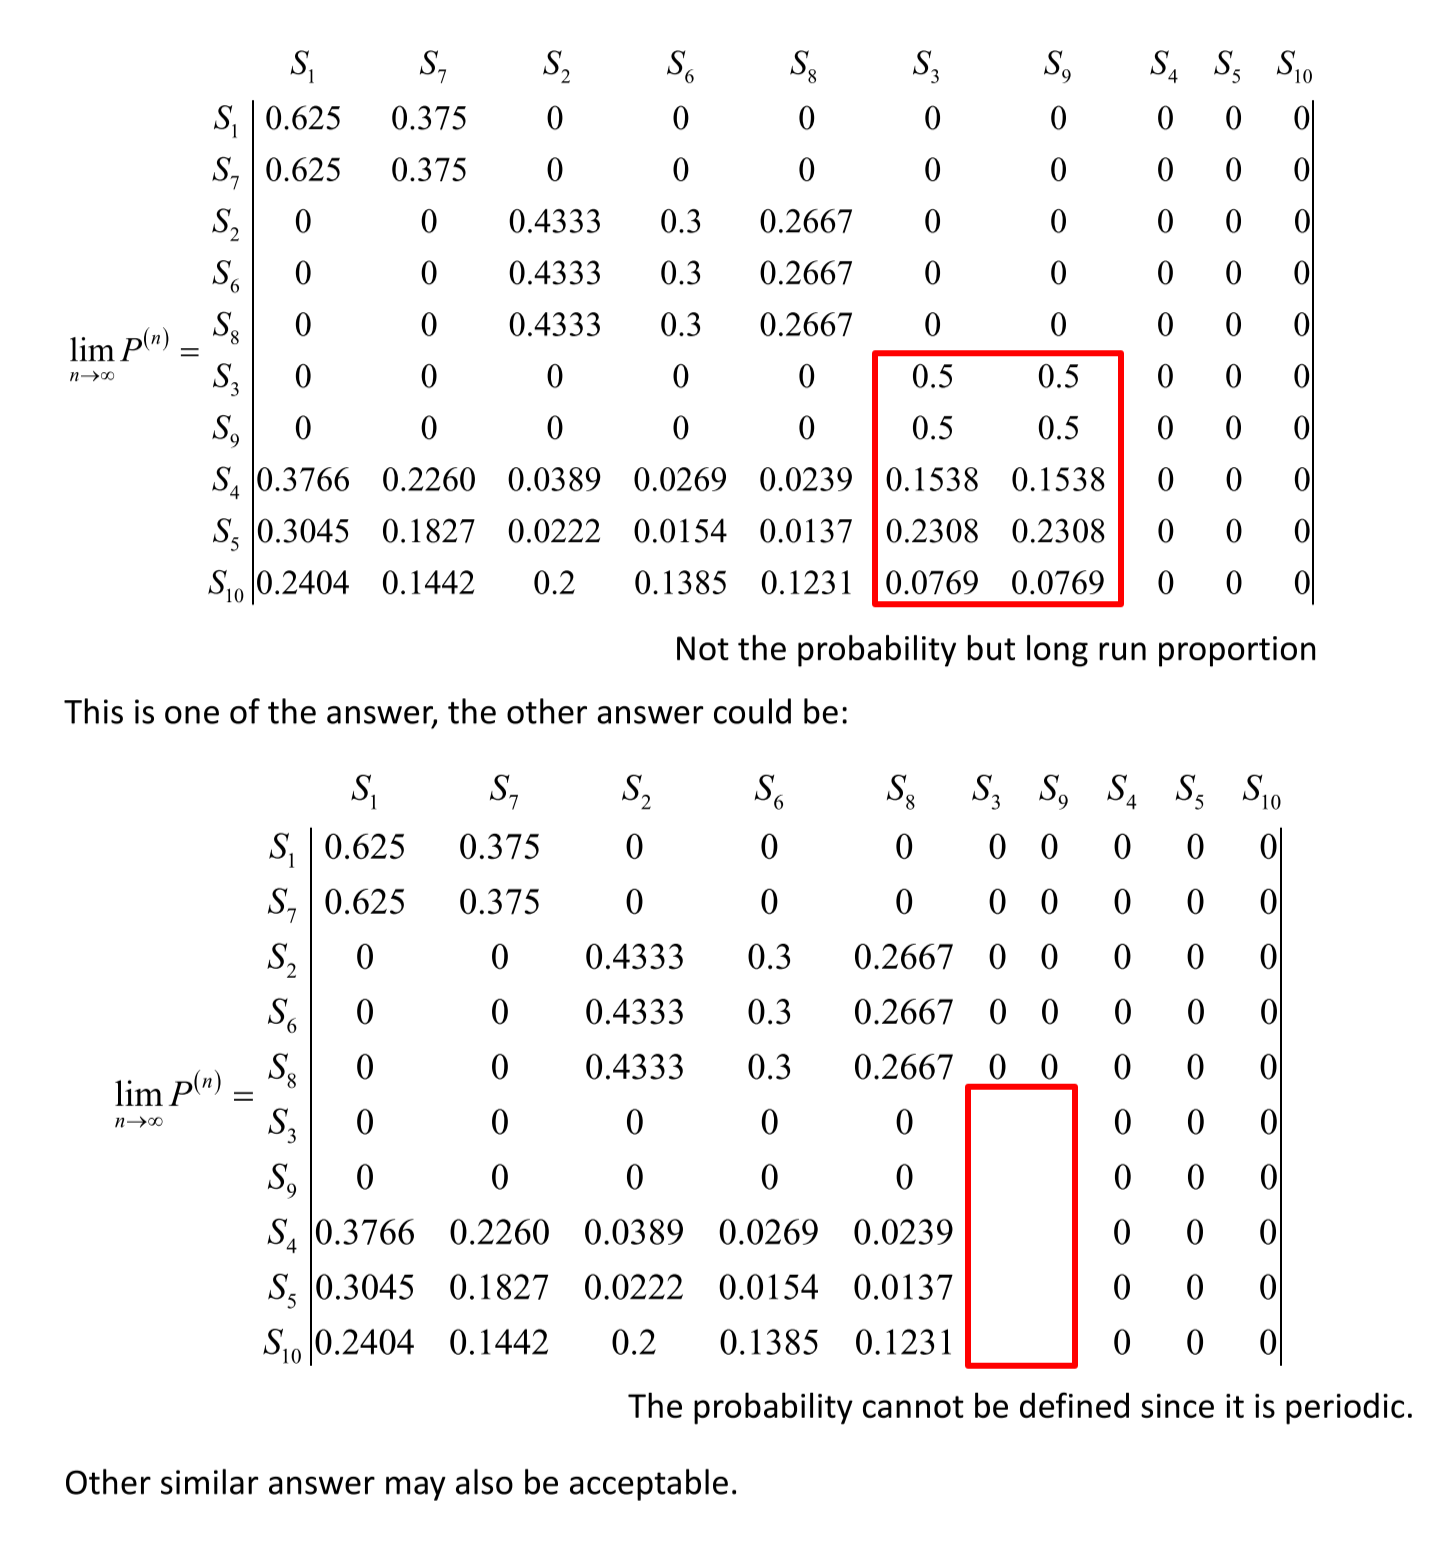

$$
\begin{align}
a&=b+c \\
d+e&=a
\end{align}
$$

In [53]:
# S_ij for {S4,S5,S10}

x = np.matrix([[.2,.5,.1],
                [.4,.3,0],
                [.2,.1,.3]]).reshape(3,3)

s = np.linalg.inv(np.identity(3)-x)
s

matrix([[2.09401709, 1.53846154, 0.2991453 ],
        [1.1965812 , 2.30769231, 0.17094017],
        [0.76923077, 0.76923077, 1.53846154]])

In [67]:
# f_4_1 = f_7_1 = 0.602564
2.09401709 *.2

0.418803418

In [56]:
# S_55* P_59 = f_59 = f_53
# only state 5 to state 9 - ok
2.30769231 * .2

0.46153846200000004

In [57]:
# S_10_10* P_10_2 =  f_10_2= f_10_6=f_10_8
# only one state 10 to state 2 -ok
1.53846154 * .3

0.4615384619999999

In [68]:
# f_4_2
0.2991453*.3 #ok

0.08974359

In [12]:
# f_4_1 = f_7_1 = 0.602564 -ok
2.09401709 *.2 + (1.53846154+ 0.2991453)*.1

0.602564102

In [9]:
# f_5_1 = f_5_7 = 0.48717948800000005 -ok
2.30769231 * .1 + 1.1965812*.2 + 0.17094017 *.1

0.48717948800000005

In [10]:
# f_10_1 = f_10_7 = 0.38461538500000003 -ok
0.76923077 *.2 + 0.76923077*.1+ 1.53846154*.1

0.38461538500000003